In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score,classification_report

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML(TRAINING)/heart_disease (1).csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print(df.describe())

              age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]


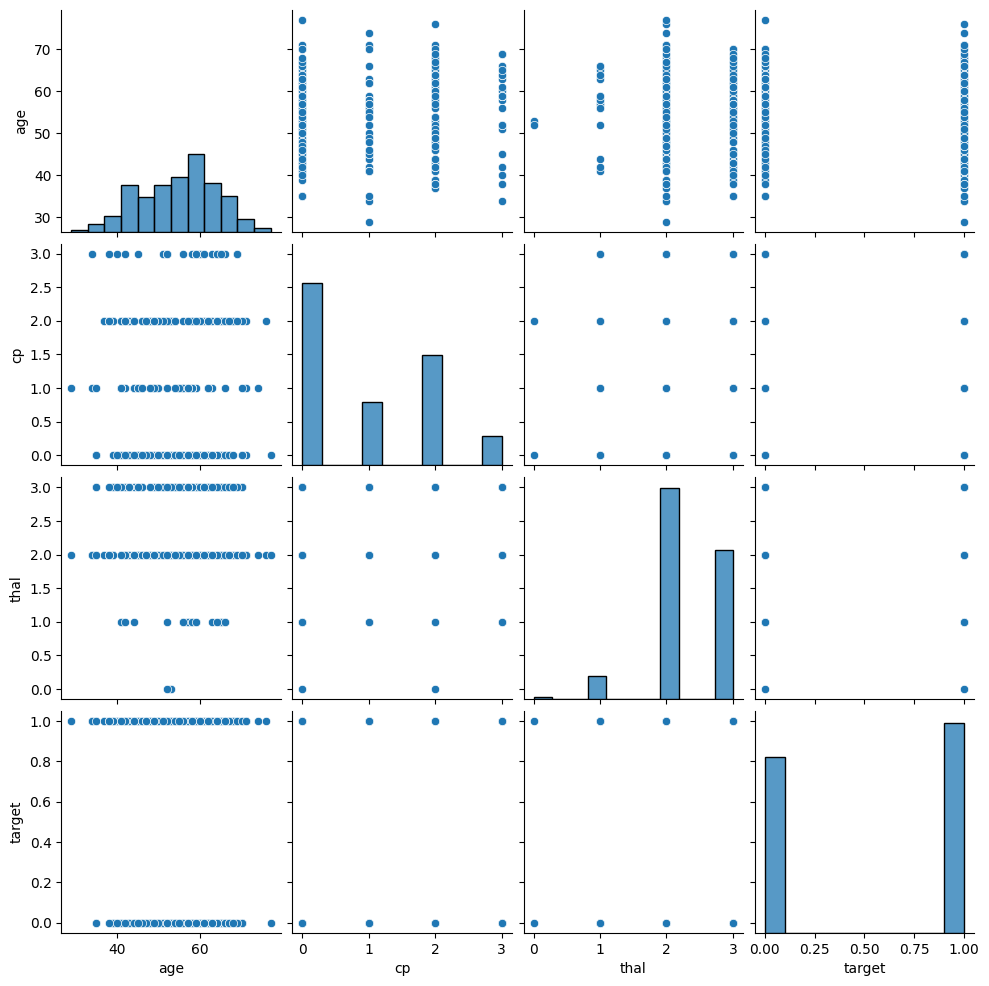

In [ ]:
sns.pairplot(df[['age', 'cp','thal','target']])

In [ ]:
      #feature and target
      X = df[['age','cp','thalach']]
      y = df['target']

In [ ]:
# train _tst split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
    #model initilizing and training
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#prediction and performance
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [ ]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
y_proba

array([0.15401842, 0.87322841, 0.83848874, 0.36952641, 0.49067515,
       0.8425142 , 0.45179644, 0.26023633, 0.18256325, 0.75038225,
       0.34923933, 0.81897308, 0.73067334, 0.23757009, 0.76251311,
       0.90222878, 0.891293  , 0.16950161, 0.23969723, 0.19382268,
       0.84148333, 0.12503306, 0.03859077, 0.54097726, 0.78437417,
       0.69970411, 0.71276011, 0.66533929, 0.20700427, 0.47613737,
       0.10811216, 0.26211897, 0.09672201, 0.42911741, 0.59434714,
       0.30557707, 0.83275639, 0.87650944, 0.95407946, 0.69542732,
       0.84121534, 0.63674561, 0.43938461, 0.87502336, 0.77776541,
       0.40626141, 0.43985142, 0.79549766, 0.32948396, 0.34156766,
       0.42320553, 0.42177724, 0.52641012, 0.76358172, 0.51004936,
       0.29883338, 0.62229813, 0.82394111, 0.24205593, 0.29177252,
       0.26377887])

In [ ]:
def predict_heart_des():
  age = int(input("enter age: "))
  cp = int(input("Enter chest pain type(0-3)"))
  thalach = int(input("enter maximum heart rate achived: "))

  user_data = pd.DataFrame([[age,cp,thalach]],columns=['age','cp','thalach'])

  prediction = model.predict(user_data)
  result ="heart disease present" if prediction[0] == 1 else "no heart disease"
  return result

In [ ]:
predict_heart_des()

enter age: 25
Enter chest pain type(0-3)1
enter maximum heart rate achived: 145


'heart disease present'

In [ ]:
predict_heart_des()

enter age: 23
Enter chest pain type(0-3)0
enter maximum heart rate achived: 120


'no heart disease'

In [ ]:
predict_heart_des()

enter age: 80
Enter chest pain type(0-3)3
enter maximum heart rate achived: 100


'no heart disease'